In [3]:
%load_ext dotenv
%dotenv ../src/.env
import sys
sys.path.append("../src")
from logger import get_logger
_logs = get_logger(__name__)

In [8]:
import dask
dask.config.set({'dataframe.query-planning': True})
import dask.dataframe as dd
import pandas as pd
import numpy as np
import os
from glob import glob

In [19]:
ft_dir = os.getenv("FEATURES_DATA")
ft_glob = glob(ft_dir+'/*.parquet')
df = dd.read_parquet(ft_glob).compute().reset_index()

# Sampling in Python

+ There are different packages that allow sampling.
+ A practical approach is to use pandas/Dask sampling methods.

## Random Sampling

+ Sample n rows from a dataframe with [`df.sample()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html).

```
DataFrame.sample(
    n=None, frac=None, replace=False, weights=None, 
    random_state=None, axis=None, ignore_index=False
    )
```

In [14]:
df.sample(n = 5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,year,Close_lag_1,log_returns,returns
ticker,,,,,,,,,,,,
JNJ,2018-05-17 00:00:00-04:00,107.394302,107.479881,105.734055,105.990791,6473400,0.0,0.0,2018,107.274490,-0.012039,-0.011966
UNH,2020-09-16 00:00:00-04:00,295.404463,298.443852,292.661365,292.967194,3438200,0.0,0.0,2020,293.645844,-0.002314,-0.002311
UNH,2020-06-24 00:00:00-04:00,279.838101,282.798409,271.823433,275.259644,3399900,0.0,0.0,2020,283.274445,-0.028701,-0.028293
JPM,2017-01-20 00:00:00-05:00,68.477142,68.805452,68.362234,68.674126,18436800,0.0,0.0,2017,68.370415,0.004432,0.004442
MSFT,2014-03-03 00:00:00-05:00,32.110841,32.288672,31.746718,31.992289,29717500,0.0,0.0,2014,32.441082,-0.013931,-0.013834


In [42]:
simple_sample_dt = df.sample(frac = 0.1)
simple_sample_dt.shape, df.shape

((4860, 13), (48602, 13))

Look at the distribution of tickers.

<Axes: >

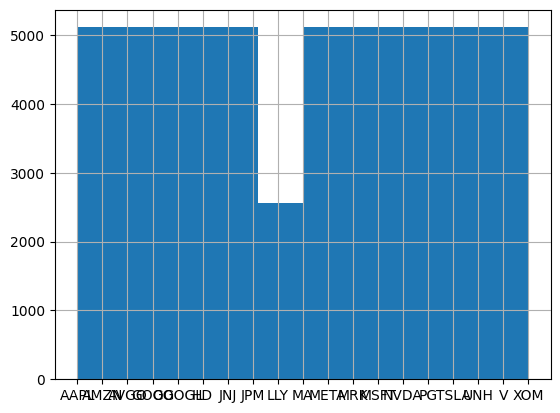

In [44]:
df['ticker'].hist()

<Axes: >

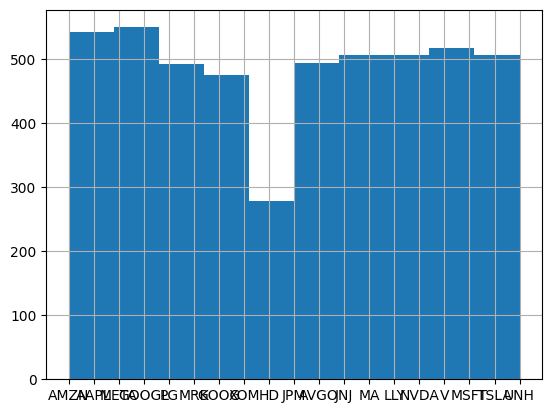

In [43]:
simple_sample_dt['ticker'].hist()

## Stratified Sampling

+ Use `groupby()` and `.sample()` for stratified sampling.

<Axes: >

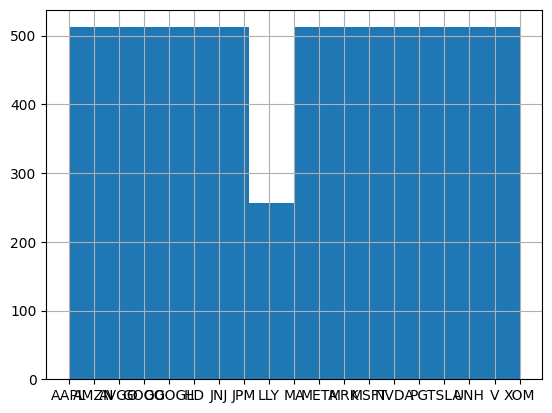

In [36]:
strat_sample_dt = df.groupby(['ticker']).sample(frac = 0.1)
strat_sample_dt['ticker'].hist()

# Sampling in Dask

+ Stratified sampling in `dask` can be achieved with `groupby().apply()` and a lambda function.

C:\Users\JesusCalderon\AppData\Local\Temp\ipykernel_1980\3864709739.py:4: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  .apply(lambda x: x.sample(frac = 0.1)).compute())


<Axes: >

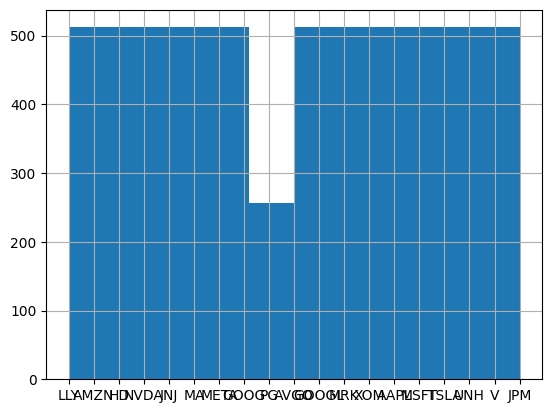

In [57]:
dd_dt = dd.read_parquet(ft_glob)
strat_sample_dd_dt = (dd_dt
                      .groupby('ticker', group_keys=False)
                      .apply(lambda x: x.sample(frac = 0.1)).compute())
strat_sample_dd_dt.reset_index()['ticker'].hist()